In [132]:
import pandas as pd

In [133]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [135]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [136]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [137]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [138]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [139]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [140]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [143]:
len(X_train)

712

In [144]:
len(X_test)

179

In [145]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth= 3)

In [146]:
model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [147]:
model.score(X_test,y_test)

0.8156424581005587

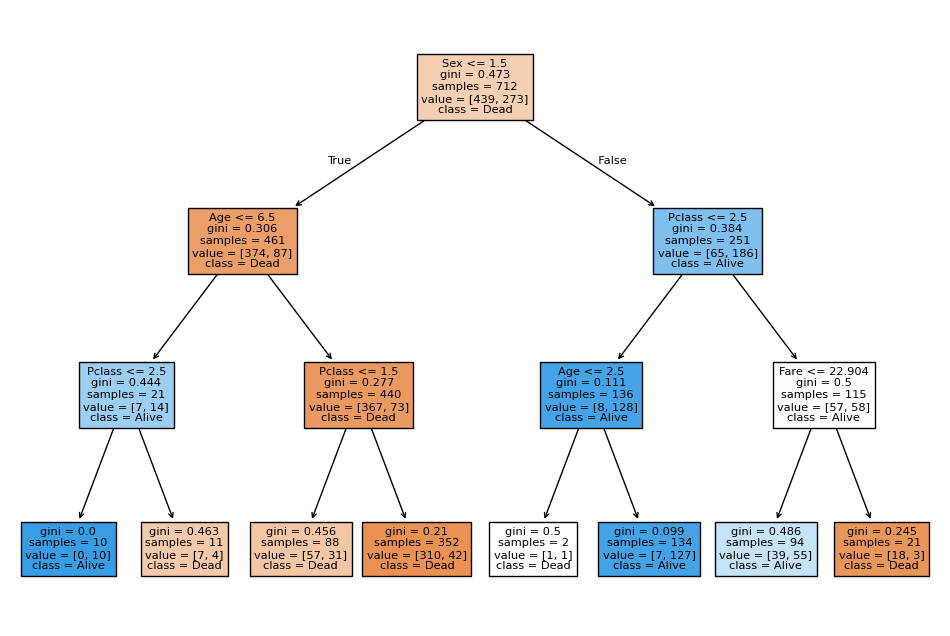

In [148]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=inputs.columns, class_names=["Dead", "Alive"])
plt.show()

[0.23405591 0.650721   0.07115655 0.04406654]


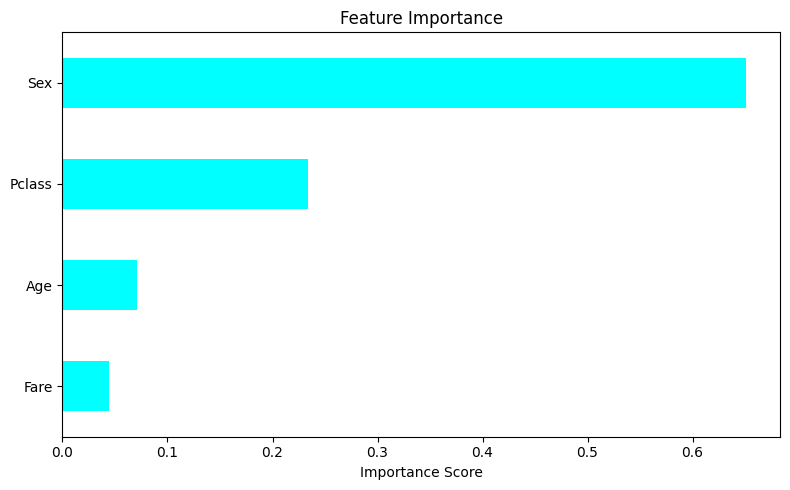

In [149]:
importances = model.feature_importances_
print(importances)
# Get feature names
feature_names = X_train.columns

# Create a pandas Series for easy plotting
importance_series = pd.Series(importances, index=feature_names)

# Sort the importances
importance_series = importance_series.sort_values(ascending=True)

# Plot
plt.figure(figsize=(8, 5))
importance_series.plot(kind='barh', color='cyan')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()